# Polarimetry using IBIS data! 

#### IBIS is a filtergraph (Fabry-Perot), so be prepared for few wavelengths but really nice images. 

#### We have both Ca II 8542 and Fe I 6302 spectral line (those of you who attended the last workshop might remember this). So it means we will have some chromospheric AND some photospheric spectral line.

#### We will do something similar to what we did with the SOLIS data, except here we have much higher spatial resolution (but also much smaller chunk of the solar surface), so we will be able to see some more peculiar and interesting features (hopefully)



In [1]:
# Import fun stuff
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits 

In [2]:
# Then load the data
cube_ca = fits.open("/home/milic/data/DKIST_workshop_IV/IBIS_polarimetry/CaII.8542.Stokes.fits")[0].data
cube_ca.shape

(4, 35, 419, 217)

In [3]:
# Let's reorder it a bit: 
cube_ca = cube_ca.transpose(2,3,0,1)

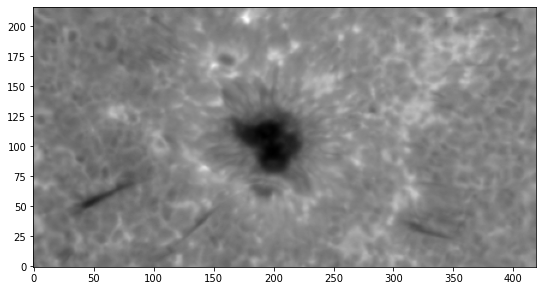

In [4]:
# And plot an image to see what it looks like:
plt.figure(figsize=[9,5])
plt.imshow(cube_ca[:,:,0,5].T,origin='lower',cmap='gray')

### Nice! Note that I did not use the wavelength with index 0 as I am not sure how the spectrum look like yet. Let's have a look at it now

In [7]:
mean_spectrum_ca = np.mean(cube_ca,axis=(0,1))
ll_ca = fits.open("/home/milic/data/DKIST_workshop_IV/IBIS_polarimetry/CaII.8542.wavelengths.fits")[0].data
ll_ca.shape

(35,)

Text(0, 0.5, 'Intensity')

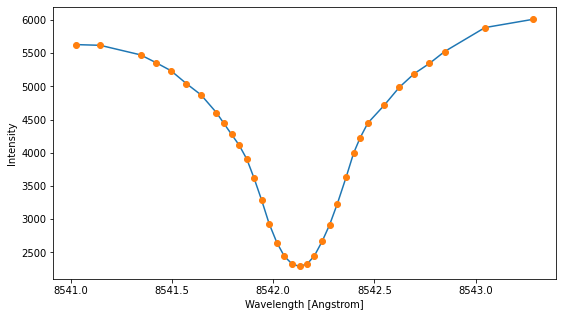

In [8]:
# And now we can plot the spectrum! 
plt.figure(figsize=[9,5])
plt.plot(ll_ca,mean_spectrum_ca[0])
plt.plot(ll_ca,mean_spectrum_ca[0],'o')
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Intensity")

#### Looks good! Seems like we have a nice chunk of the inner part of Ca II 8542 line. Let's make a 4-panel plot that will show the following: 
- "Continuum" intensity (not really continuum, but furthers possible from the line core)
- Line core intensity 
- Linear polarization close to the line core
- Circular polarization close to the line core

#### To do that we will first plot the spectrum vs the wavelength index and also derivative of the Stokes with respect to the wavelength. 

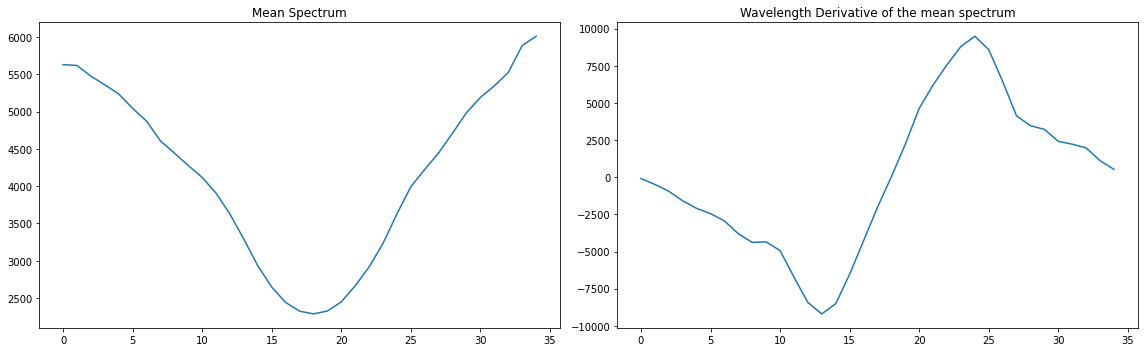

In [9]:
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.plot(mean_spectrum_ca[0])
plt.title("Mean Spectrum")
plt.subplot(122)
plt.plot(np.gradient(mean_spectrum_ca[0])/np.gradient(ll_ca))
plt.title("Wavelength Derivative of the mean spectrum")
plt.tight_layout()


#### From this we can conclude that:
- Line core is around index 17
- Greatest derivative $dI/d\lambda$ is around index 13, tht is where we expect the most of the Stokes V

Let's plot some maps now!

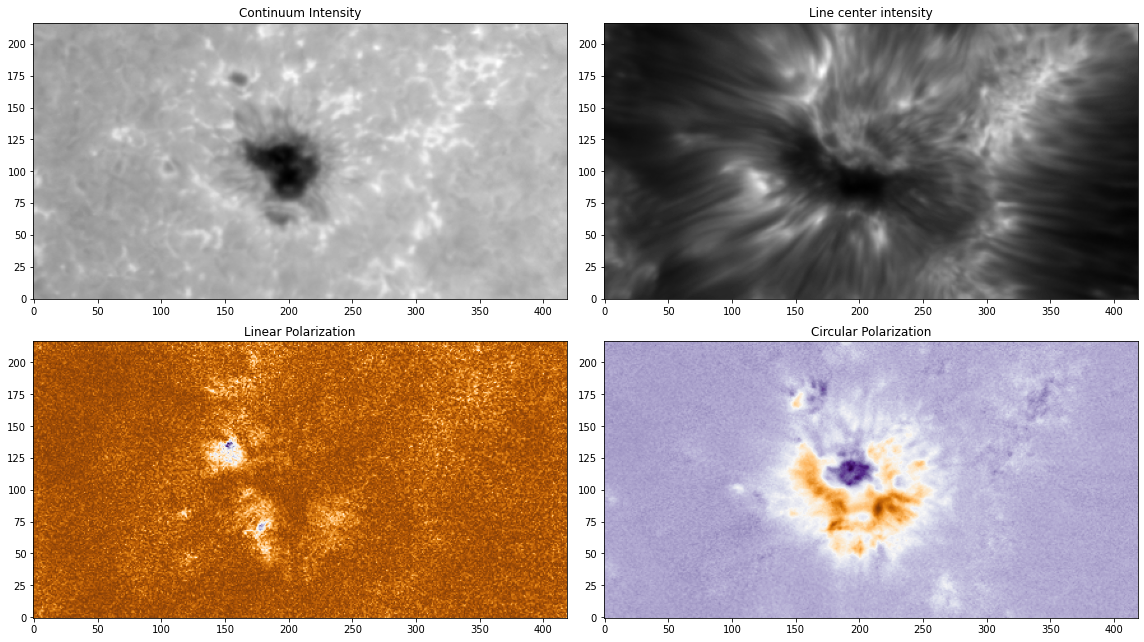

In [10]:
plt.figure(figsize=[16,9])
plt.subplot(221)
plt.imshow(cube_ca[:,:,0,-1].T,origin='lower',cmap='gray')
plt.title("Continuum Intensity")
plt.subplot(222)
plt.imshow(cube_ca[:,:,0,17].T,origin='lower',cmap='gray')
plt.title("Line center intensity")
plt.subplot(223)
linpol = (cube_ca[:,:,1,13]**2.0+cube_ca[:,:,2,17]**2.0)**0.5
plt.imshow(linpol.T,origin='lower',cmap='PuOr')
plt.title("Linear Polarization")
plt.subplot(224)
plt.imshow(cube_ca[:,:,3,13].T,origin='lower',cmap='PuOr')
plt.title("Circular Polarization")
plt.tight_layout()


### It should not come as a big surprise that the strongest signals are around the sunspot! 

What else do you notice? 

.

.

.

.

.

It is a common practice to "normalize" the data, meaning divide everything with the quiet Sun continuum. Here the data has been normalized so that mean quiet Sun continuum is 10 000, so we will just go ahead and divide the whole cube with that quantity: 

In [11]:
cube_ca /= 10000.
# And re-calculate the mean:
mean_spectrum_ca = np.mean(cube_ca,axis=(0,1))

Now let's plot some interesting profiles, just to see how it looks like! 

We chose the following pixels: 

A quiet Sun : (57,55)

Near spot  (225,68)

A spot (200,100)

A pore (161, 171) 

A plage (179, 207)

Let's see where the spectra are and how do their spectra look like! 

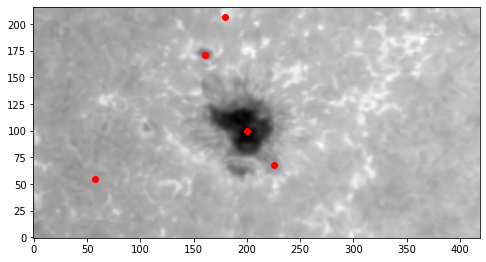

In [12]:
# Let's first see where these points are 
i_p = np.array([57,225,200,161,179])
j_p = np.array([55,68,100,171,207])
feature = ['QS','Close to spot','Spot','Pore','Plage']

plt.figure(figsize=[8,5])
plt.imshow(cube_ca[:,:,0,-1].T,origin='lower',cmap='gray')
plt.plot(i_p,j_p,'ro')

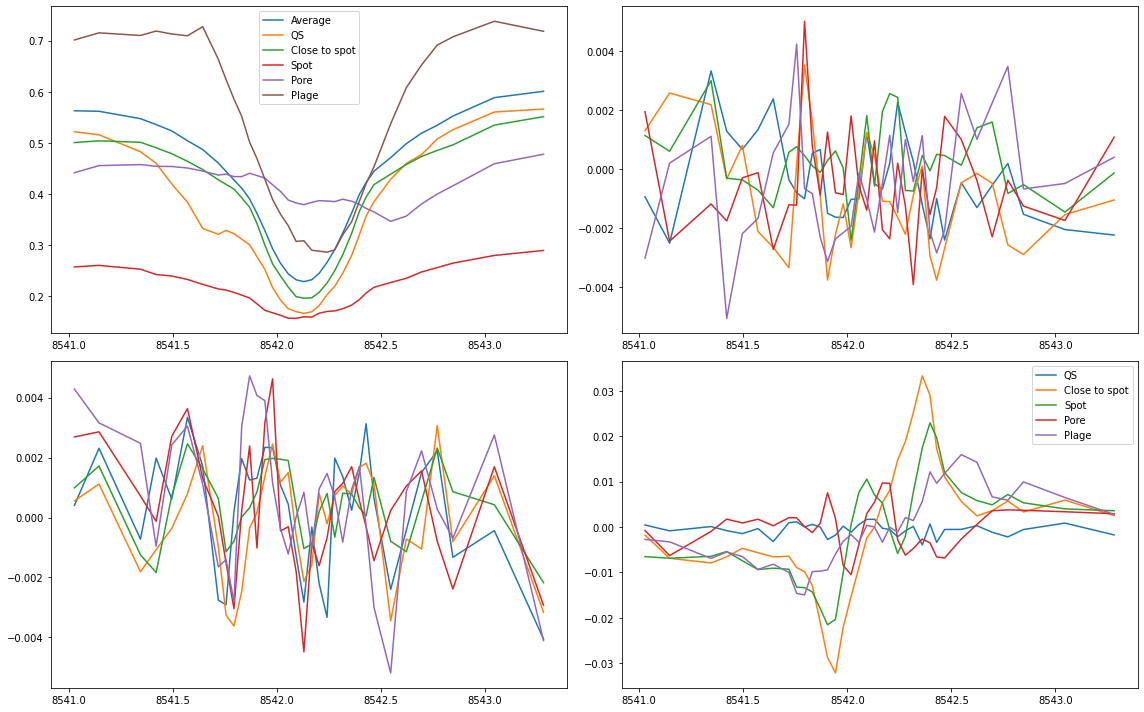

In [13]:
# Now plot some spectra: 
plt.figure(figsize=[16,10])
plt.subplot(221)
plt.plot(ll_ca,mean_spectrum_ca[0],label='Average')
for i in range(0,5):
    plt.plot(ll_ca,cube_ca[i_p[i],j_p[i],0,:],label=feature[i])
    plt.legend()
plt.subplot(222)
for i in range(0,5):
    plt.plot(ll_ca,cube_ca[i_p[i],j_p[i],1,:],label=feature[i])
plt.subplot(223)
for i in range(0,5):
    plt.plot(ll_ca,cube_ca[i_p[i],j_p[i],2,:],label=feature[i])
plt.subplot(224)
for i in range(0,5):
    plt.plot(ll_ca,cube_ca[i_p[i],j_p[i],3,:],label=feature[i])
    plt.legend()
plt.tight_layout()


### There is a lot to discuss here: 

- Shapes of the lines 
- Intensities
- Polarization (or the absence of)
- Spectral resolution
- Noise
.
.
.
. 
Spend some time discussing with each other and thinking what do we see from these profiles. 

#### What would you say is the lvel of noise in this data?

### Add iron observations to the mix! 

#### We have complementary observations in a photospheric line 6302 which is *very* sensitive to the magntic field (discuss why)! Let's repeat the plots above for iron. 

In [14]:
cube_fe = fits.open('/home/milic/data/DKIST_workshop_IV/IBIS_polarimetry/FeI.6302.Stokes.fits')[0].data
ll_fe = fits.open("/home/milic/data/DKIST_workshop_IV/IBIS_polarimetry/FeI.6302.wavelengths.fits")[0].data
print(cube_fe.shape)
cube_fe = cube_fe.transpose(2,3,0,1)
print(ll_fe.shape)
cube_fe /= 10000.0
mean_spectrum_fe = np.mean(cube_fe,axis=(0,1))

(4, 23, 419, 217)
(23,)


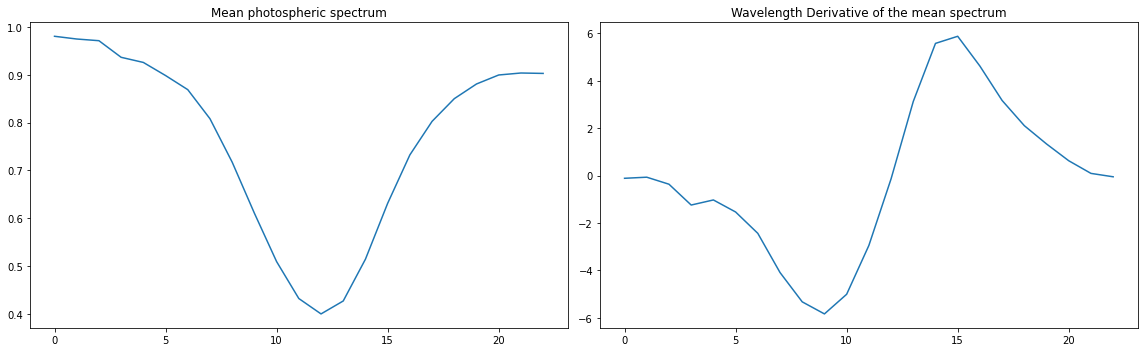

In [15]:
# Plot mean spectrum of Iron
plt.figure(figsize=[16,5])
plt.subplot(121)
plt.plot(mean_spectrum_fe[0])
plt.title("Mean photospheric spectrum")
plt.subplot(122)
plt.plot(np.gradient(mean_spectrum_fe[0])/np.gradient(ll_fe))
plt.title("Wavelength Derivative of the mean spectrum")
plt.tight_layout()

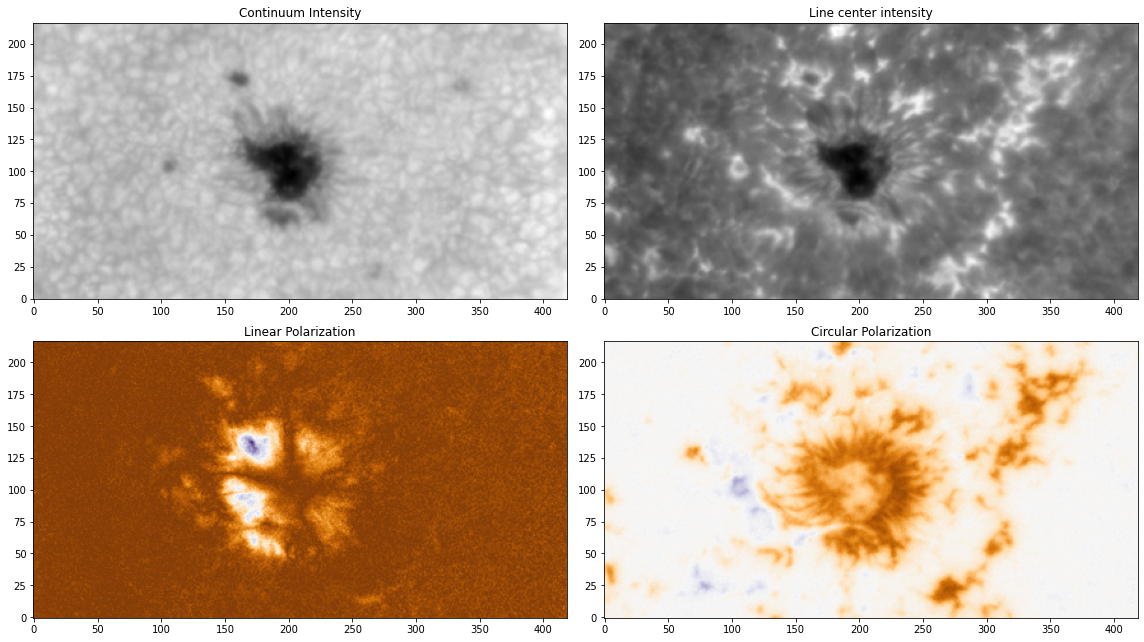

In [16]:
# Now this allows us to plot nice images, as previously:

plt.figure(figsize=[16,9])
plt.subplot(221)
plt.imshow(cube_fe[:,:,0,0].T,origin='lower',cmap='gray')
plt.title("Continuum Intensity")
plt.subplot(222)
plt.imshow(cube_fe[:,:,0,12].T,origin='lower',cmap='gray')
plt.title("Line center intensity")
plt.subplot(223)
linpol = (cube_fe[:,:,1,9]**2.0+cube_ca[:,:,2,17]**2.0)**0.5
plt.imshow(linpol.T,origin='lower',cmap='PuOr',vmin=0,vmax=0.1)
plt.title("Linear Polarization")
plt.subplot(224)
plt.imshow(cube_fe[:,:,3,9].T,origin='lower',cmap='PuOr',vmin=-0.2,vmax=0.2)
plt.title("Circular Polarization")
plt.tight_layout()

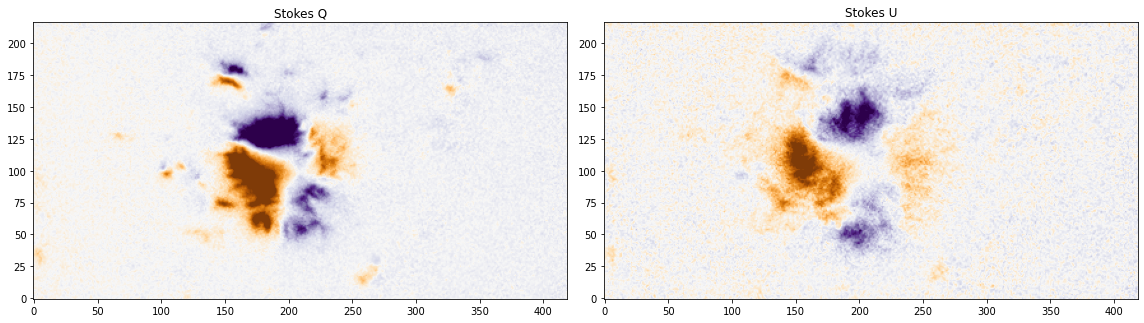

In [17]:
# We can also plot separately Q and U

plt.figure(figsize=[16,9])
plt.subplot(121)
plt.imshow(cube_fe[:,:,1,12].T,origin='lower',cmap='PuOr',vmin=-0.05,vmax=0.05)
plt.title("Stokes Q")
plt.subplot(122)
plt.imshow(cube_fe[:,:,2,9].T,origin='lower',cmap='PuOr',vmin=-0.05,vmax=0.05)
plt.title("Stokes U")
plt.tight_layout()

### Let's also compare the map of Stokes V in Ca II 8542 and Fe I 6302. 
#### What can you conclude? 

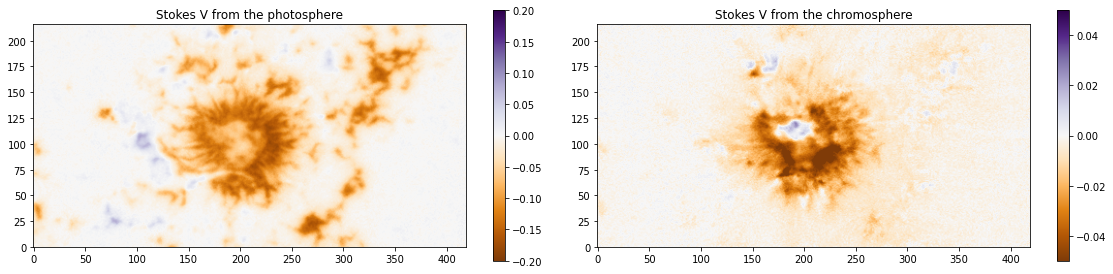

In [18]:
plt.figure(figsize=[16,9])
plt.subplot(121)
plt.imshow(cube_fe[:,:,3,9].T,origin='lower',cmap='PuOr',vmin=-0.2,vmax=0.2)
plt.title("Stokes V from the photosphere")
plt.colorbar(shrink=0.4)
plt.subplot(122)
plt.imshow(cube_ca[:,:,3,12].T,origin='lower',cmap='PuOr',vmin=-0.05,vmax=0.05)
plt.title("Stokes V from the chromosphere")
plt.colorbar(shrink=0.4)
plt.tight_layout()

### We can now plot the Iron profiles for those pixels too! 

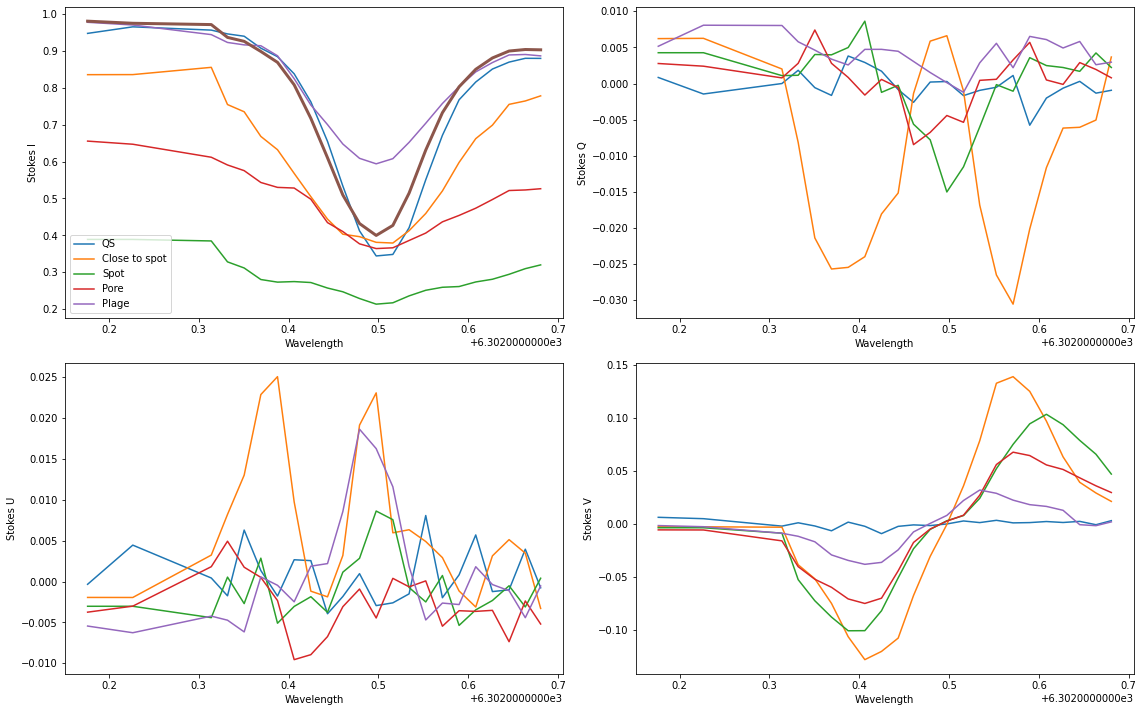

In [19]:
# Now plot some spectra: 
plt.figure(figsize=[16,10])
plt.subplot(221)
for i in range(0,5):
    plt.plot(ll_fe,cube_fe[i_p[i],j_p[i],0,:],label=feature[i])
    plt.legend()
    plt.xlabel("Wavelength")
    plt.ylabel("Stokes I")
plt.plot(ll_fe,mean_spectrum_fe[0],label='Average',linewidth=3.0)
plt.subplot(222)
for i in range(0,5):
    plt.plot(ll_fe,cube_fe[i_p[i],j_p[i],1,:],label=feature[i])
    plt.xlabel("Wavelength")
    plt.ylabel("Stokes Q")
plt.subplot(223)
for i in range(0,5):
    plt.plot(ll_fe,cube_fe[i_p[i],j_p[i],2,:],label=feature[i])
    plt.xlabel("Wavelength")
    plt.ylabel("Stokes U")
plt.subplot(224)
for i in range(0,5):
    plt.plot(ll_fe,cube_fe[i_p[i],j_p[i],3,:],label=feature[i])
    plt.xlabel("Wavelength")
    plt.ylabel("Stokes V")
plt.tight_layout()

#### What do you see here? What do you think of these profiles? (At the end we will use WFA on them too!)

##  USE WEAK FIELD APPROXIMATION ON Ca II 8542 

Import Brian's code from yesterday and try to use it to infer magnetic field using Weak Field approximation. Principle is similar, it's just the type of data that is different. 

In [20]:
# This will allow us to use routines witten for SOLIS 
import sys
sys.path.append("/home/milic/codes/dkist_workshop_4/SOLIS/")

In [21]:
import wfa
import mask
import numpy as np 

In [22]:
# Actually we can do a bit simpler linear fit than in the SOLIS case 
def wfa_simple(wavelength,I,V):
    
    g = 1.1
    ll0 = 8542.0 # Has to be in Angstrom
    dI_dl = np.gradient(I) / np.gradient(wavelength)
    
    # Now do a linear fit, it has the form ax+b = y, where a and b are unknown.
    # cast it as a matrix equation
    N = len(I) # number of data points 
    A = np.zeros([N,2])
    A[:,0] = dI_dl * -4.867E-13 * ll0**2.0 * g
    A[:,1] = 1.0
    
    #
    y = np.copy(V)
    # unknown, p?
    p = np.linalg.solve(A.T @ A, A.T @ y)
    return p

In [23]:
# Test it on the sunspot profile: 
test = wfa_simple(ll_ca,cube_ca[200,100,0],cube_ca[200,100,3])
print (test[0])

-1656.2414937657593


Text(0, 0.5, 'Stokes V')

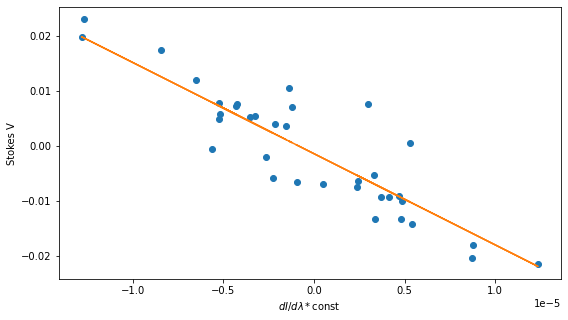

In [24]:
x = np.gradient(cube_ca[200,100,0]) / np.gradient(ll_ca) * -4.67E-13 * 1.1 * 8542.0**2.0
y = cube_ca[200,100,3]

plt.figure(figsize=[9,5])
plt.plot(x,y,'o')
plt.plot(x,x*test[0]+test[1])
plt.xlabel("$dI/d\lambda * \mathrm{const}$")
plt.ylabel("Stokes V")


In [25]:
# Looks reasonable! Let's now calculate for the whole set! :-)

B_los = np.zeros([419,217])
for i in range(0,419):
    for j in range(0,217):
        B_los[i,j] = wfa_simple(ll_ca,cube_ca[i,j,0],cube_ca[i,j,3])[0]

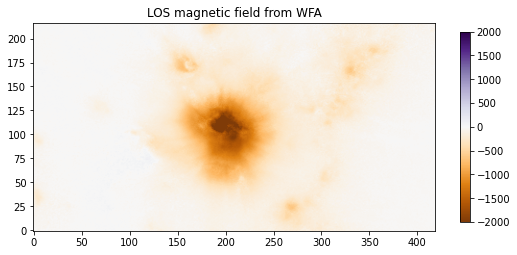

In [26]:
# And now plot the map:
plt.figure(figsize=[9,5])
plt.imshow(B_los.T,origin='lower',cmap='PuOr',vmin=-2000,vmax=2000)
plt.title("LOS magnetic field from WFA")
plt.colorbar(shrink=0.7)

#### Let's discuss this image for a while and see what is going on. Is magnetic field strong or weak compared to what you expected? 

#### Some things to discuss / try out: 

- Swap between the original and the interpolated data
- Fir linear polarization with the WFA to try and get some idea on transversal magnetic field 
- Change the number of points / region of fit? 
- Estimate uncertainty?

### Let's try some transversal magnetic field estimation! :-) 

#### $L(\lambda_0) = \frac{3}{4}B_{T}^2 \left|C_{T}\frac{1}{\lambda_w-\lambda_0}\right|\left|\frac{\partial I}{\partial \lambda}\right|$

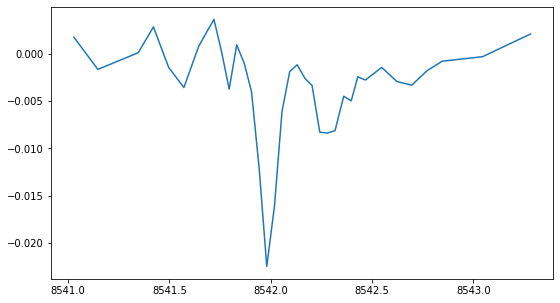

In [27]:
CT = 1.21 * 8542**2.0 * 4.68E-13
x = np.gradient(cube_ca[200,100,0]) / np.gradient(ll_ca) * CT
y = (cube_ca[200,100,1] **2.0 + cube_ca[200,100,2] ** 2.0) ** 0.5

# But we also have to select the wavelengths outside of the core. LEt's see where they are! 
plt.figure(figsize=[9,5])
plt.plot(ll_ca,cube_ca[155,135,1])



[10 11 12 13 14 15 16 17 23 24 25 26 27 28]


<Figure size 648x360 with 0 Axes>

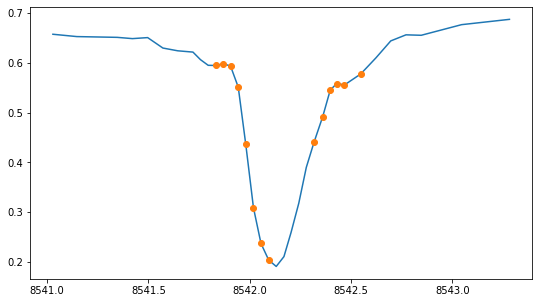

In [28]:
region_of_interest = np.where(np.logical_or(np.logical_and(ll_ca > 8542.3,ll_ca< 8542.6),\
                                           np.logical_and(ll_ca > 8541.8,ll_ca< 8542.1)))
region_of_interest = np.asarray(region_of_interest)[0]
print (region_of_interest)

plt.figure(figsize=[9,5])
plt.figure(figsize=[9,5])
plt.plot(ll_ca,cube_ca[155,135,0])
plt.plot(ll_ca[region_of_interest],cube_ca[155,135,0,region_of_interest],'o')


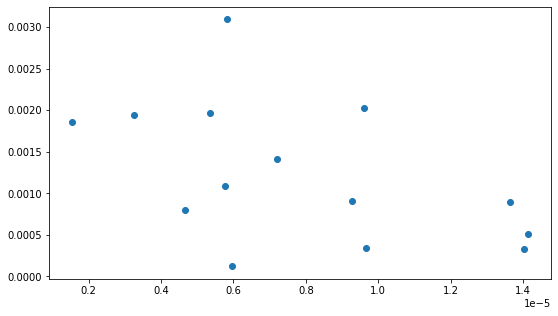

In [29]:
plt.figure(figsize=[9,5])
plt.plot(np.abs(x[region_of_interest]),y[region_of_interest],'o')

### Anything to fit here? 

Probably not :-( , but let's give it a go! 

In [30]:
def wfa_simple_t(wavelength,I,LP,region):
    
    gT = 1.21
    ll0 = 8542.0 # Has to be in Angstrom
    dI_dl = np.gradient(I) / np.gradient(wavelength)
    
    x = dI_dl * -4.867E-13 * ll0**2.0 * gT
    x = np.abs(x)
    
    # Now do a linear fit, it has the form ax+b = y, where a and b are unknown.
    # cast it as a matrix equation
    N = len(I[region]) # number of data points 
    A = np.zeros([N,2])
    A[:,0] = x[region]
    A[:,1] = 1.0
    
    #
    y = np.copy(LP[region])
    # unknown, p?
    p = np.linalg.solve(A.T @ A, A.T @ y)
    return p

In [31]:
test = (wfa_simple_t(ll_ca,cube_ca[155,135,0],(cube_ca[155,135,1]**2.0 + cube_ca[155,135,2]**2.0)**0.5,region_of_interest))
print (test)

[1.38615557e+02 4.55651033e-04]


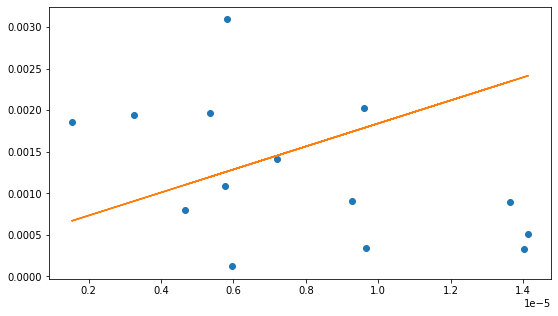

In [32]:
plt.figure(figsize=[9,5])
plt.plot(np.abs(x[region_of_interest]),y[region_of_interest],'o')
plt.plot(np.abs(x[region_of_interest]),np.abs(x[region_of_interest])*test[0]+test[1])

### We can try this on the on the whole field of view, see if we get anything. 

In [34]:
B_t = np.zeros([419,217])
for i in range(0,419):
    for j in range(0,217):
        B_t[i,j] = test = (wfa_simple_t(ll_ca,cube_ca[i,j,0],(cube_ca[i,j,1]**2.0 \
                                + cube_ca[i,j,2]**2.0)**0.5,region_of_interest))[0]
        

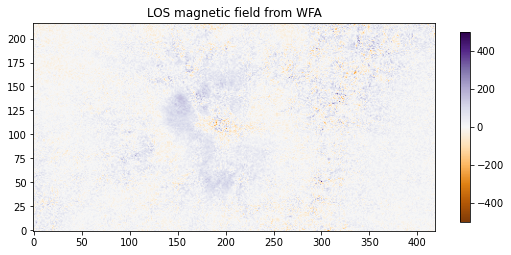

In [36]:
# And now plot the map:
plt.figure(figsize=[9,5])
plt.imshow(B_t.T,origin='lower',cmap='PuOr',vmin=-500,vmax=500)
plt.title("LOS magnetic field from WFA")
plt.colorbar(shrink=0.7)

#### Finally, quickly the same thing for FeI 6302. 

WFA is not very viable in most of the field, but the important thing will be to show the different spatial distribution of the maps: sharper and with many details for FeI, much more diffuse (and lower values) for Fe.
